In [39]:
import h5py
import numpy as np
from scipy.spatial.transform import Rotation
import matplotlib.pyplot as plt

In [29]:
data_path = "/data1/jessica/data/toyota/once_w_lanes_compressed_raw_small_multitask_all_test.hfd5" 
people_seqs = []
with h5py.File(data_path, "r") as f:
        for seq_key in list(f.keys()):
            iter_dict = {}
            keys_ = f[seq_key].keys()
            for key in keys_:
                ds_obj = f[seq_key][key][()]
                iter_dict[key] = ds_obj
            people_seqs.append(iter_dict)

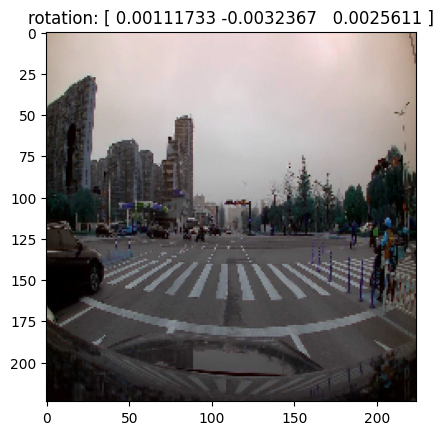

In [50]:
prev_rot = [0,0,0]
for elem in people_seqs:
    pos = elem['pos']
    image = elem["image_array"]
    for i in range(1, len(pos)):
        #p = pos[i] - pos[i-1]
        rotation = Rotation.from_quat(pos[i][:4]).as_euler('zyx', degrees=True)    
        prev_rotation = Rotation.from_quat(pos[i-1][:4]).as_euler('zyx', degrees=True)       
        plt.imshow(image[i-1])
        plt.title(f"rotation: {rotation-prev_rotation}")
        plt.savefig(f"./images/{i-1}.png")
        prev_rot = rotation
        if i > 100: break
    break
    

In [52]:
people_seqs[0]['distance']

array([  7,  59,  -1,  42,  -1,  15,  13,  13,  13,  13,  13,  13,  13,
        13,  13,  13,  13,  13,  13,  11,   7,   3,  -1,  36,  19, 114,
        53,  75,  50,  29,  17,  16,  21,  24,  24, 101,  44,  27,  21,
        19,  18,  19,  22,  22,  22,  21,  20,  22,  24,  26,  24,  18,
        16,   9,   7,   6,   6,   6,   6,   6,   6,   6,   6,   6,   6,
         6,   6,   6,   6,   6,   6,   6,   3,   6,   6,  10,  20,  27,
        20,  18,  42,  29,  20,  22,  32,  25,  21,  18,  10,  25,  23,
        21,  20,  23,  23,  53,  24,  -1,  21,  19,  21,  33,  28,  48,
        88,  92, 152,  -1,  -1,  98,  92,  60,  71,  44,  48,  49,  46,
        18,  19,  30,  18,  23,  24,  17,  16,   7,   6,   6,   6,   6,
         6,   6,   6,   6,   6,   9,  15,  14,  16,  20,  24,  28,  28,
        20,  16,  11,   2,  38,  17,  19,  33,  33,  26,  30,  29,  27,
        18,  27,  25,  26,  19,  23,  19,  20,  22,   9,  11,   9,  10,
         8,   8,   7,   4,   4,   2,   4,   4,   4,   4,   4,   

In [28]:
rotation = Rotation.from_quat(pos[:4]).as_euler('zyx', degrees=True)

In [21]:
rotation[0]


-3.9987035835581395

In [5]:
angles = [list(seq["angle"]) for seq in people_seqs]

In [34]:
flat_list = np.array([item for sublist in angles for item in sublist])

In [35]:
mi = flat_list.min()
ma = flat_list.max()
rang = ma - mi

In [36]:
mi, ma, rang

(2.1073424e-08, 1.5222348, 1.5222348)

In [37]:
flat_list.sort()

In [39]:
np.median(flat_list)

0.00018448659

In [50]:
an_array = flat_list
mean = np.mean(an_array)
standard_deviation = np.std(an_array)
distance_from_mean = abs(an_array - mean)
max_deviations = 3
not_outlier = distance_from_mean < max_deviations * standard_deviation
no_outliers = an_array[not_outlier]

In [53]:
no_outliers.min(), no_outliers.max(), no_outliers.max()  - no_outliers.min()

(2.1073424e-08, 0.102598816, 0.102598794)